# Binary Classification - Home Team Win-Loss Modeling
This short script imports logistic regression model class from sklearn and splits the data into test and validation sets to evaluate the performance on out of sample games.

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report
import plotly.express as px

In [28]:
data = pd.read_csv('nbaHomeWinLossModelDataset.csv').drop(['Unnamed: 0'],axis=1)
data = data.dropna()

data_new = pd.read_csv('gameLogs.csv')

data

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.531250,1.000000,2.0,0.500000,0.666667,-0.333333,0.547383,1,2022-23,0.533898,1.000000,3.0,0.000000,0.333333,-9.666667,0.549413
3536,0.626087,0.242424,2.0,0.212121,0.227273,-10.666667,0.564607,0,2022-23,0.605263,0.354839,2.0,0.277778,0.313433,-6.666667,0.534304
3537,0.517857,0.357143,2.0,0.264706,0.306452,7.666667,0.553343,1,2022-23,0.537815,0.266667,2.0,0.225806,0.245902,-8.000000,0.538467
3538,0.529412,0.240000,4.0,0.259259,0.250000,-0.333333,0.566698,1,2022-23,0.522523,0.304348,1.0,0.266667,0.283019,-6.666667,0.550896


# Basics Graphs of Dataset

In [31]:
import plotly.express as px

import matplotlib.pyplot as plt


AttributeError: module 'matplotlib.pyplot' has no attribute 'sc'

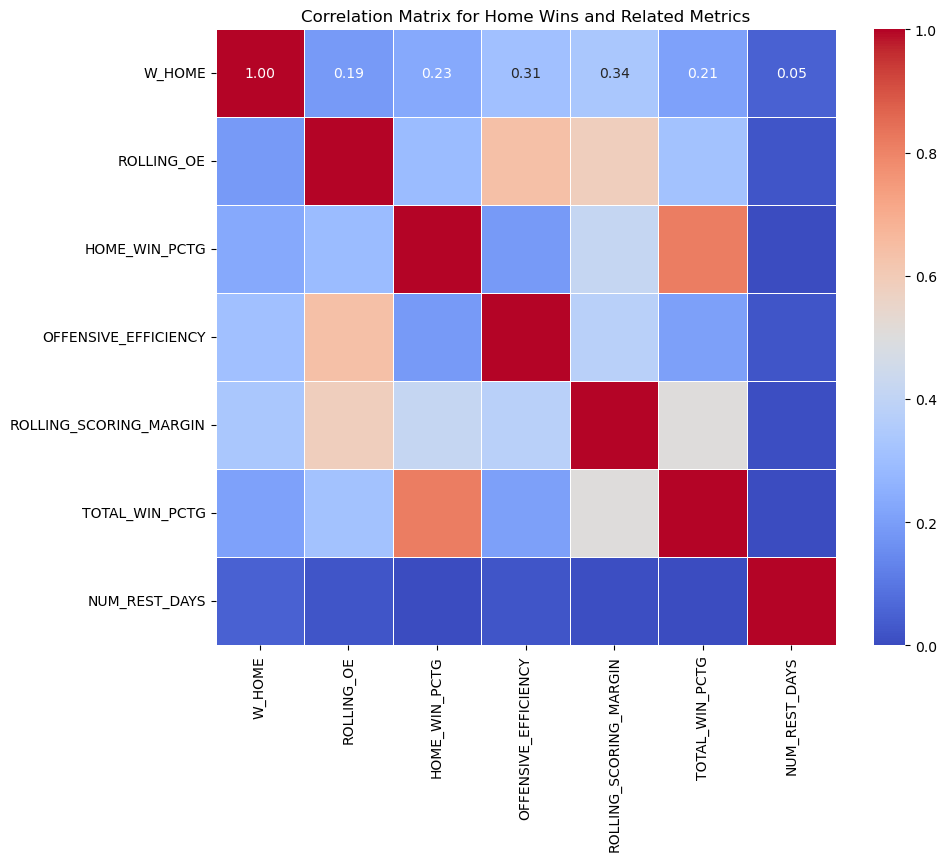

In [6]:
import seaborn as sns

# Selecting relevant columns for correlation analysis
relevant_columns = ['W_HOME', 'ROLLING_OE', 'HOME_WIN_PCTG', 'OFFENSIVE_EFFICIENCY', 'ROLLING_SCORING_MARGIN', 
                    'TOTAL_WIN_PCTG', 'NUM_REST_DAYS']

# Calculating the correlation matrix
correlation_matrix = data_new[relevant_columns].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Home Wins and Related Metrics')
plt.show()


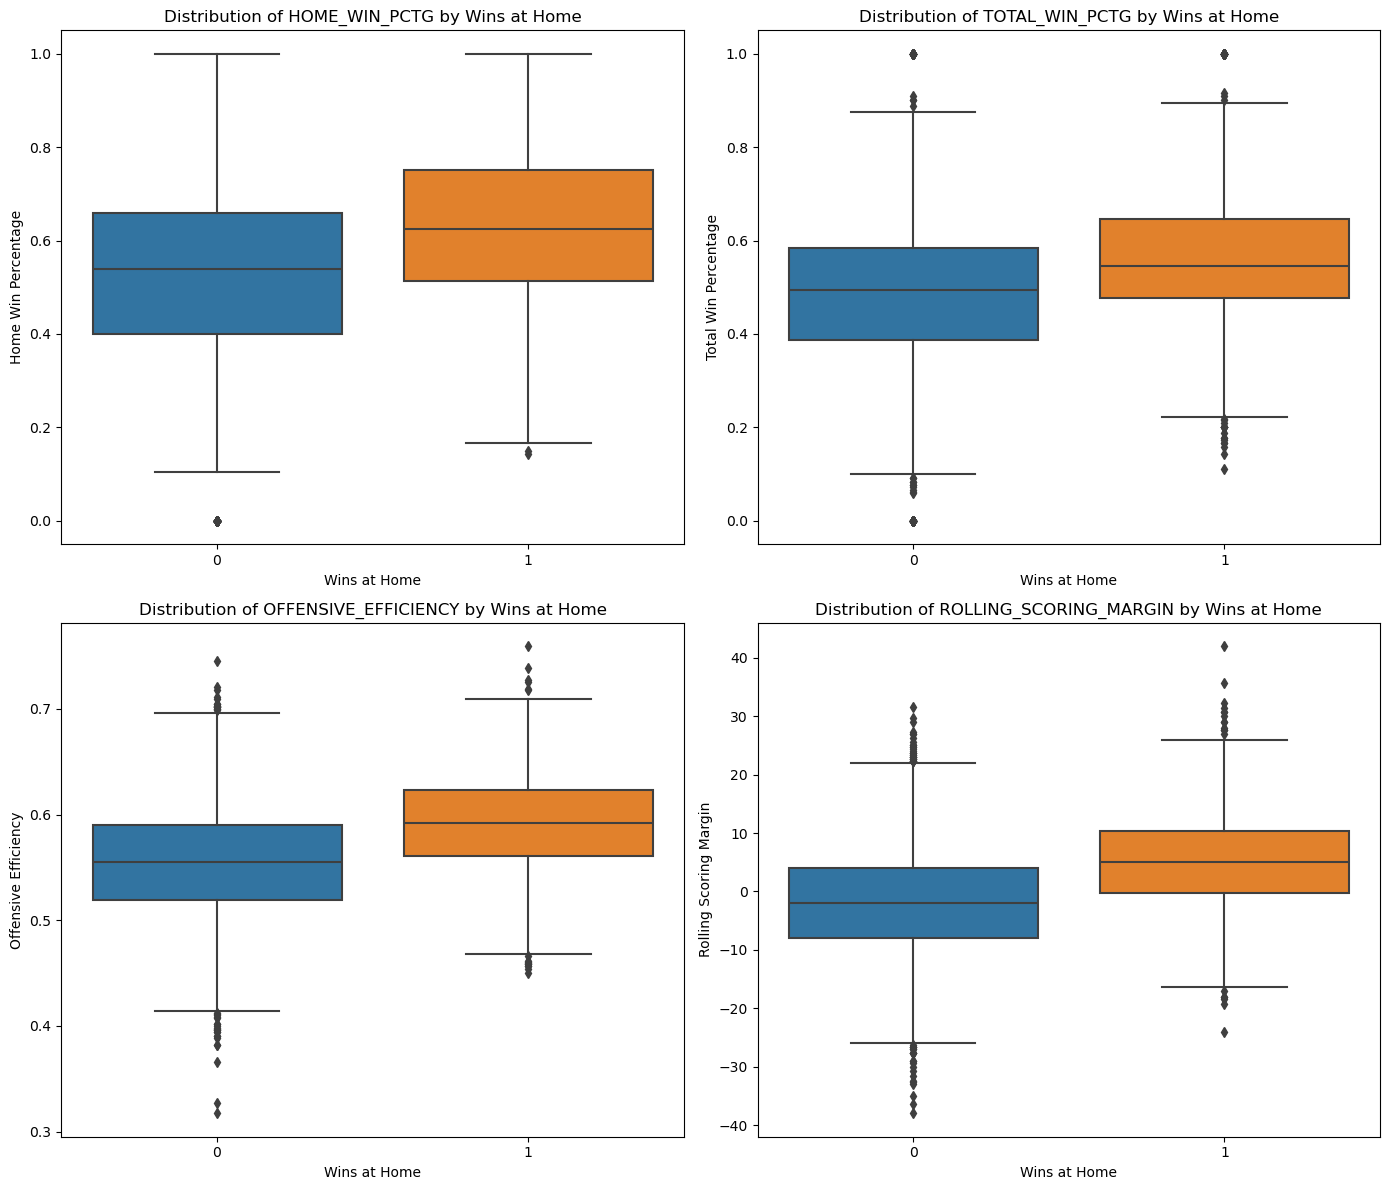

In [7]:
# Plotting box plots for highly correlated variables with W_HOME

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# W_HOME vs HOME_WIN_PCTG
sns.boxplot(ax=axes[0, 0], data=data_new, x='W_HOME', y='HOME_WIN_PCTG')
axes[0, 0].set_title('Distribution of HOME_WIN_PCTG by Wins at Home')
axes[0, 0].set_xlabel('Wins at Home')
axes[0, 0].set_ylabel('Home Win Percentage')

# W_HOME vs TOTAL_WIN_PCTG
sns.boxplot(ax=axes[0, 1], data=data_new, x='W_HOME', y='TOTAL_WIN_PCTG')
axes[0, 1].set_title('Distribution of TOTAL_WIN_PCTG by Wins at Home')
axes[0, 1].set_xlabel('Wins at Home')
axes[0, 1].set_ylabel('Total Win Percentage')

# W_HOME vs OFFENSIVE_EFFICIENCY
sns.boxplot(ax=axes[1, 0], data=data_new, x='W_HOME', y='OFFENSIVE_EFFICIENCY')
axes[1, 0].set_title('Distribution of OFFENSIVE_EFFICIENCY by Wins at Home')
axes[1, 0].set_xlabel('Wins at Home')
axes[1, 0].set_ylabel('Offensive Efficiency')

# W_HOME vs ROLLING_SCORING_MARGIN
sns.boxplot(ax=axes[1, 1], data=data_new, x='W_HOME', y='ROLLING_SCORING_MARGIN')
axes[1, 1].set_title('Distribution of ROLLING_SCORING_MARGIN by Wins at Home')
axes[1, 1].set_xlabel('Wins at Home')
axes[1, 1].set_ylabel('Rolling Scoring Margin')

plt.tight_layout()
plt.show()

## Change the 0 and 1 to loss and wins

---

In [8]:
validation = data[data['SEASON'] == '2022-23']
modelData = data[data['SEASON'] != '2022-23'].sample(frac=1)


In [9]:
X = modelData.drop(['HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']

# Splitting the data into training and testing sets
# training set is 67% of the data and testing set is 33% of the data
# X_train is the training data set
# X_test is the testing data set 
# y_train is the set of labels to all the data in X_train
# y_test is the set of labels to all the data in X_test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

In [10]:
#Logistic Regression
model = LogisticRegression()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

0.6348773841961853

In [11]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.61 (+/- 0.12)


In [12]:
# Test Set Review
y_pred = model.predict(scaled_data_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.56       332
           1       0.65      0.73      0.69       402

    accuracy                           0.63       734
   macro avg       0.63      0.62      0.62       734
weighted avg       0.63      0.63      0.63       734



In [13]:
#Validation Set review

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(validation.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(validation.drop(['HOME_W','SEASON'],axis=1))

In [14]:
# How the model performs on unseen data
y_pred = model.predict(scaled_val_data)
print(classification_report(validation['HOME_W'],y_pred))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49       493
           1       0.65      0.73      0.69       690

    accuracy                           0.61      1183
   macro avg       0.60      0.59      0.59      1183
weighted avg       0.61      0.61      0.61      1183



/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



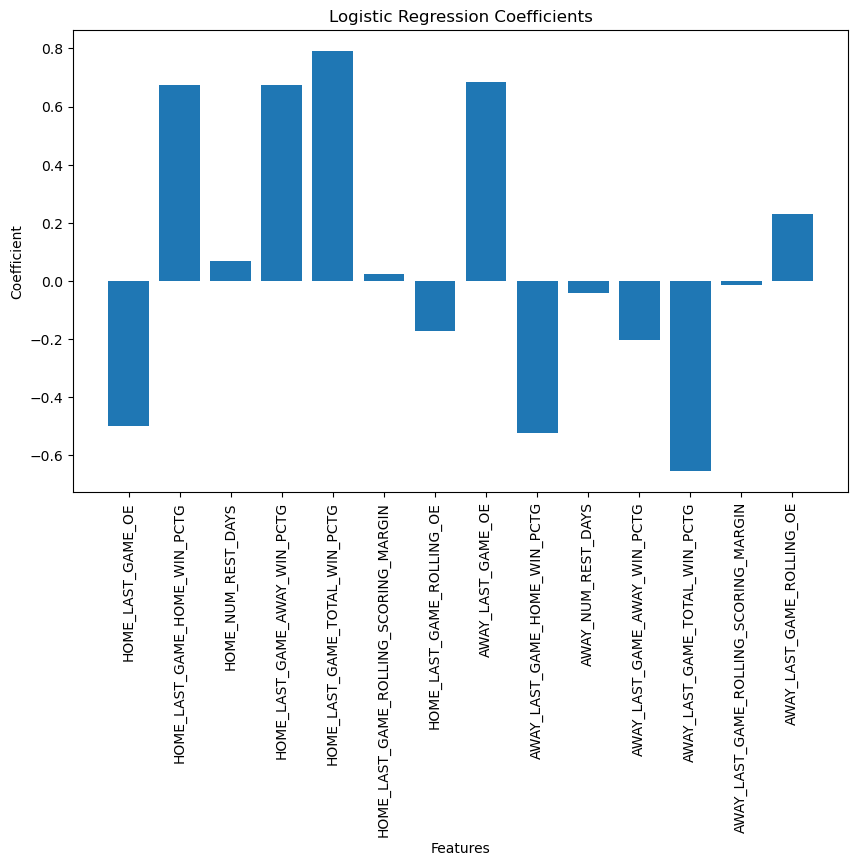

In [15]:
import matplotlib.pyplot as plt

# Fit the logistic regression model
model.fit(X_train, y_train)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()


# annotations
* Graphs show the features used in the regression model and their coefficient.
* Having a larger positive value indicates that the feature is a good a predicting a home win
* while a negative value indicates that the feature is gooding a predicting a home loss

In [27]:
# plot the data and the model prediction( regression model prediction)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # The Sequential model is a linear stack of layers.
from tensorflow.keras.layers import Dense # The Dense layer is a fully connected layer.

# Define the model architecture, loss function, and optimizer. Uses binary crossentropy as the loss function and the Adam optimizer.
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Compile the model, specifying the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric.
# The Adam optimizer is a variant of gradient descent that is widely used in machine learning because it automatically adapts the learning rate during training.
# Binary crossentropy is a loss function used for binary classification problems, and accuracy is a common evaluation metric for classification models.
# The compile method configures the model for training by specifying the optimizer, loss function, and evaluation metric.
# The optimizer is responsible for updating the model's weights during training, the loss function is used to measure the model's performance, and the evaluation metric is used to monitor the model's performance during training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, specifying the training data, number of epochs, and batch size.
# The fit method trains the model on the training data for a fixed number of epochs (iterations over the entire dataset).
# The batch size specifies the number of samples that are used to compute the gradient update during training.
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model, calculating the loss and accuracy on the test set.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


NameError: name 'X_train' is not defined

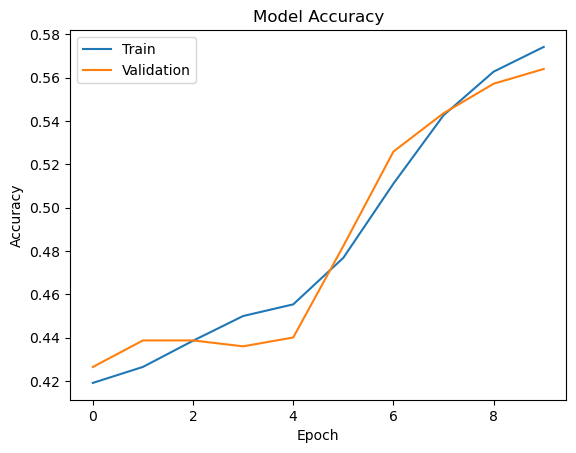

In [ ]:
# Plot training and validation accuracy, loss over epochs, to visualize the model's performance during training.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss over epochs, to visualize the model's performance during training.

## Data Preparation and Preprocessing
* be split into training and validation sets based on the 'SEASON' column.
## Logistic Regression Model
* The data is split into training (2/3) and testing (1/3) sets. From a dataset of the season from 2019 to 2022.
* Features are standardized using StandardScaler to improve the logistic regression model's performance, which common pratice in genral.
* A logistic regression model is trained on the scaled training data, achieving an accuracy of approximately 57% on the testing set. The model's performance is further evaluated using F1 score and a classification report, which includes precision, recall, and F1-score for the binary outcomes (0 for loss, 1 for win).
* The logistic regression model's coefficients are visualized, although there's a warning about the model not converging, suggesting that increasing the number of iterations or scaling the data might be necessary.
## Neural Network Model
* A simple neural network model is defined using TensorFlow and Keras, consisting of a single dense layer with a sigmoid activation function, indicating it's designed for binary classification.
* The model is compiled with the Adam optimizer and binary crossentropy loss function, then trained for 10 epochs on the same dataset. The training process includes both the training and validation datasets for performance monitoring.
* The neural network's performance on the test data shows an accuracy of around 56.4%, with training and validation accuracies plotted over epochs to visualize learning.
## Key Observations and Issues
* The logistic regression model shows decent performance but includes a warning about non-convergence, which might affect its reliability.
* The neural network model, while simple, demonstrates the process of training and evaluating a model in TensorFlow/Keras, including visualizations of accuracy over epochs.
* The document contains a KeyError when trying to plot 'FG_PCT' against the 'Home Win' outcome, indicating an issue with the dataset or variable naming.


---